In [1]:
"""
Created on: Tue. 9 Aug. 2022
Updated on: Tue. 16 Aug. 2022
Updated on: Tue. 23 Aug. 2022
Updated on: Tue. 4 Oct. 2022
Updated on: Thu. 13 Oct. 2022
Updated on: Wed. 4 Jan. 2023
Updated on: Fri. 6 Jan. 2023
Author: Mélina Verger

Plot different information for feature analysis.
"""

# To exit script
from sys import exit

# To interact with the operating system
import os

# To compute correlation
import pandas as pd
pd.set_option('display.max_columns', None)

# For data manipulation
import numpy as np

# To compute MI
from sklearn.feature_selection import mutual_info_classif

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the chosen data set (num and scaled)

user_response = input("Do you want to work with stInfo, stAll or stClick set (scaled)? (Write either stInfo, stAll or stClick.)")
if user_response == "stInfo":
    data_num_scaled = pd.read_csv("../data/studentInfo_num_scaled.csv")
elif user_response == "stAll":
    data_num_scaled = pd.read_csv("../data/studentAll_num_scaled.csv")
elif user_response == "stClick":
    data_num_scaled = pd.read_csv("../data/studentClick_num_scaled.csv")
else:
    print("Invalid choice.")
    exit()

print(user_response)

stInfo


In [3]:
data_num_scaled

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
0,1.0,0.75,0.0,1.0,0.0,0.35,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.75,1.0,0.5,0.0,0.05,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.50,0.0,0.5,0.0,0.05,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.25,0.0,0.0,0.0,0.05,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.50,0.0,0.5,0.0,0.05,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20311,0.0,0.50,0.0,0.0,0.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20312,0.0,0.25,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20313,0.0,0.25,1.0,0.5,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20314,0.0,0.50,1.0,0.0,0.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
# Correlation matrix
data_num_scaled.corr(method="kendall")

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
gender,1.000000,0.067840,-0.062496,-0.039196,-0.008899,0.067392,-0.041996,-0.037007,0.027751,-0.486509,0.169215,0.072469,0.219499,0.336506,-0.229792,-0.029154,-0.032558,0.001719,0.051849,-0.024590,-0.009894,-0.011742,-0.006593,0.024073,0.031964,0.036117,-0.010170,0.019343,-0.007573,-0.029080,-0.005917,-0.009847
highest_education,0.067840,1.000000,-0.087901,0.062536,-0.034326,0.067031,-0.072447,0.148306,0.067114,-0.050552,0.123322,0.049525,0.032499,-0.009954,-0.163947,-0.006072,-0.035277,-0.009005,0.046338,-0.028880,-0.026228,-0.018436,0.000817,-0.010336,-0.038924,0.163899,-0.008431,0.001056,-0.020124,-0.005449,-0.029745,-0.016296
imd_band,-0.062496,-0.087901,1.000000,-0.048765,0.029236,0.015178,0.054998,-0.102913,-0.043807,0.066636,-0.039484,-0.037717,-0.043751,0.008549,0.040589,0.019835,-0.002789,0.012623,-0.023633,-0.098354,-0.010186,0.001209,0.131697,0.060610,0.102441,-0.039207,-0.072635,-0.155807,-0.014811,0.021427,0.063724,0.054259
age_band,-0.039196,0.062536,-0.048765,1.000000,-0.002205,-0.084845,-0.025403,0.071755,0.088999,0.047695,-0.008670,-0.045355,-0.032621,-0.061196,0.058735,-0.006936,0.002253,-0.014846,0.016276,0.000060,-0.007945,-0.009319,0.031901,-0.035276,-0.014839,0.037948,0.016099,0.011685,0.000220,0.007759,-0.044546,-0.021995
num_of_prev_attempts,-0.008899,-0.034326,0.029236,-0.002205,1.000000,0.188418,0.047674,-0.134453,-0.039782,0.047886,-0.078105,0.087354,-0.066778,0.056829,-0.092272,0.106503,-0.041491,-0.002561,-0.039279,-0.006436,-0.001510,0.006887,0.003760,0.007345,-0.012228,0.003052,0.005382,-0.024722,-0.005919,0.024399,0.017633,-0.009214
studied_credits,0.067392,0.067031,0.015178,-0.084845,0.188418,1.000000,0.005527,-0.018439,0.028080,0.127053,-0.032737,0.098227,-0.106348,0.207732,-0.473024,0.140978,-0.021766,-0.054715,-0.038272,-0.021071,-0.003840,0.021917,0.007962,0.001360,-0.010161,-0.002136,-0.004659,-0.006663,0.002455,0.036017,-0.004204,-0.005153
disability,-0.041996,-0.072447,0.054998,-0.025403,0.047674,0.005527,1.000000,-0.036031,-0.022576,-0.002973,-0.017967,0.016656,-0.033053,-0.011710,0.059329,-0.001237,0.000957,0.007081,-0.006239,0.030438,0.016323,-0.033676,-0.012415,-0.030619,0.012527,0.012353,0.004434,0.018663,0.020288,-0.027000,-0.004540,-0.040699
final_result,-0.037007,0.148306,-0.102913,0.071755,-0.134453,-0.018439,-0.036031,1.000000,0.066490,0.008888,-0.000556,-0.054887,0.042444,-0.012926,-0.001311,-0.054579,-0.003045,-0.047965,0.086990,0.016092,0.011616,-0.000308,-0.022822,-0.008589,-0.038808,-0.010855,0.038997,0.046697,0.025309,-0.046493,-0.007578,-0.006896
code_module_AAA,0.027751,0.067114,-0.043807,0.088999,-0.039782,0.028080,-0.022576,0.066490,1.000000,-0.105534,-0.061941,-0.078445,-0.050893,-0.096588,-0.060709,-0.074131,0.088927,-0.094086,0.054770,0.021472,0.003190,-0.020980,-0.006560,-0.006579,-0.005002,-0.012883,0.004453,0.007906,0.016140,-0.023594,0.005221,0.007650
code_module_BBB,-0.486509,-0.050552,0.066636,0.047695,0.047886,0.127053,-0.002973,0.008888,-0.105534,1.000000,-0.215171,-0.272505,-0.176793,-0.335529,-0.210892,0.126215,0.006236,-0.032349,-0.073589,-0.005994,-0.009768,0.084650,-0.034792,-0.016812,-0.046472,-0.016856,0.001659,-0.033946,-0.014310,0.121491,0.002194,0.008562


Text(0.5, 1.0, 'Correlation Heatmap')

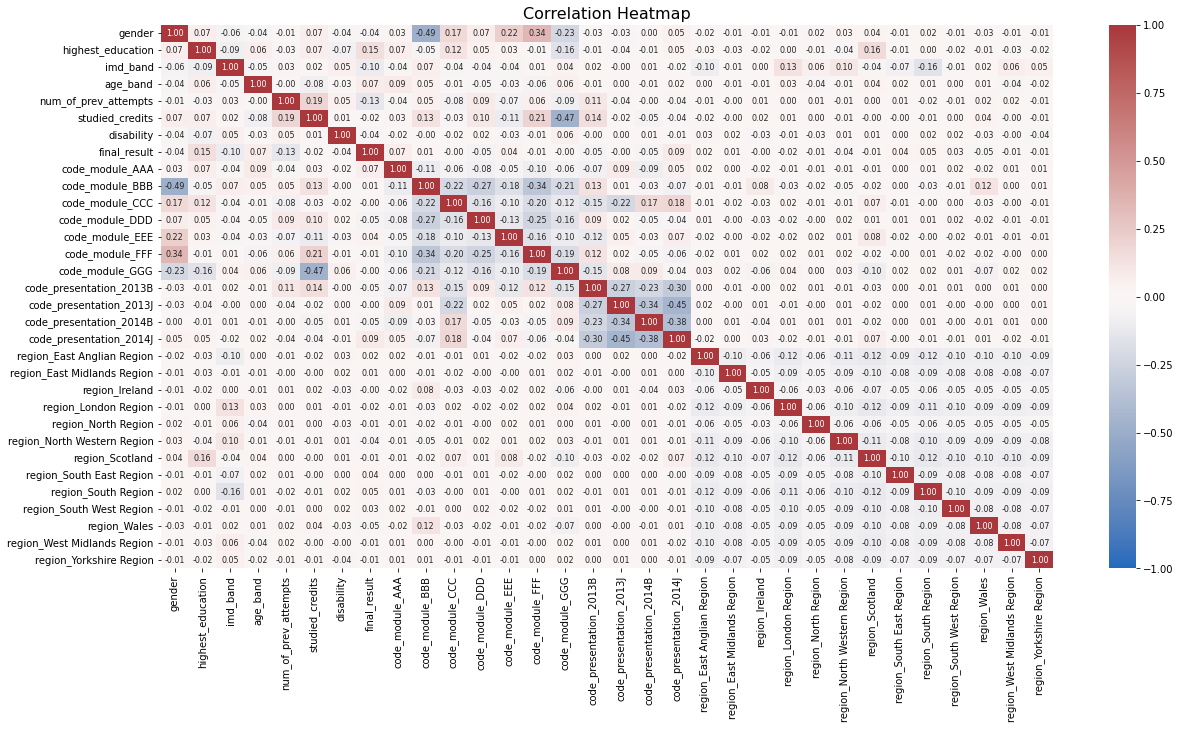

In [5]:
plt.figure(figsize=(20, 10), facecolor="white")

heatmap = sns.heatmap(
    data_num_scaled.corr(method="kendall"),  
    vmin=-1, vmax=1, # because correlation coefficient
    annot=True, 
    annot_kws={"fontsize":8},
    fmt=".2f",
    cmap="vlag"
    )

heatmap.set_title('Correlation Heatmap', fontsize=16)

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

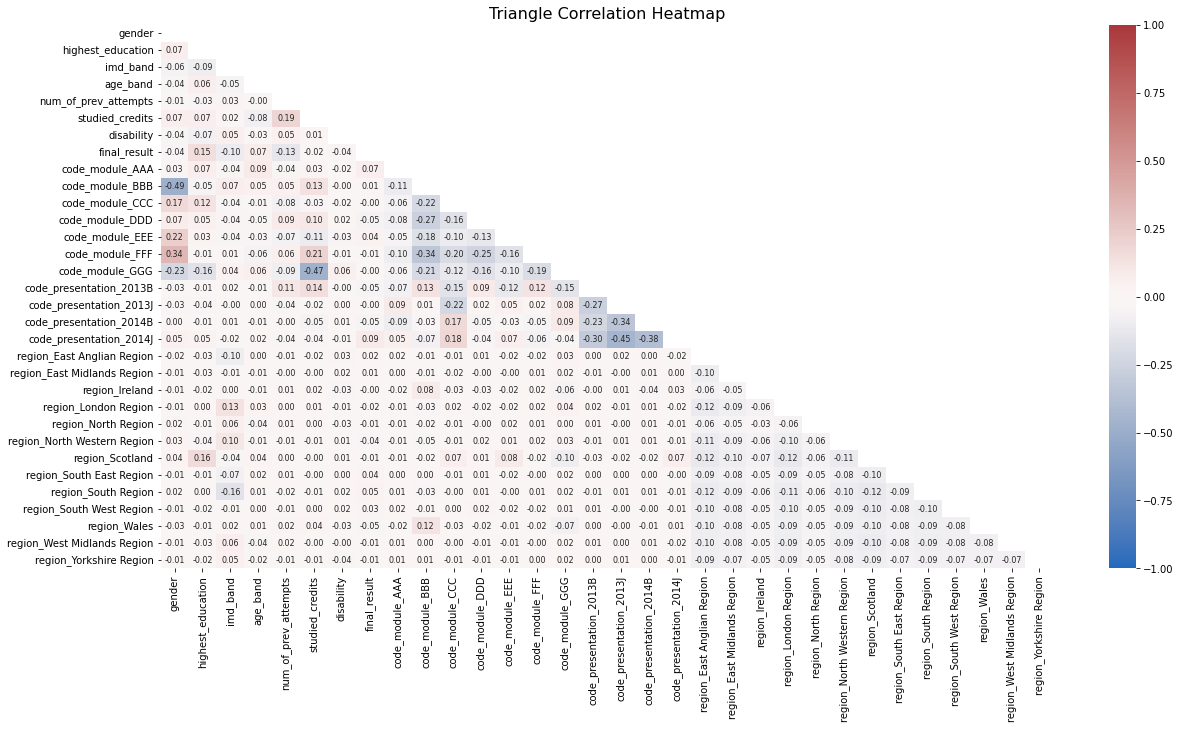

In [6]:
plt.figure(figsize=(20, 10), facecolor="white")

# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_num_scaled.corr(method="kendall"), dtype=bool))

heatmap = sns.heatmap(
    data_num_scaled.corr(method="kendall"),  
    mask=mask,
    vmin=-1, vmax=1, # because correlation coefficient
    annot=True, 
    annot_kws={"fontsize":8},
    fmt=".2f",
    cmap="vlag"
    )

heatmap.set_title('Triangle Correlation Heatmap', fontsize=16)

## Elimination

### code_presentation

In [7]:
col = list()
for column in data_num_scaled.columns:
    if "code_presentation" in column:
        col.append(column)

data_num_scaled_without_codepresentation = data_num_scaled.drop(columns=col)

In [8]:
data_num_scaled_without_codepresentation

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
0,1.0,0.75,0.0,1.0,0.0,0.35,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.75,1.0,0.5,0.0,0.05,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.50,0.0,0.5,0.0,0.05,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.25,0.0,0.0,0.0,0.05,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.50,0.0,0.5,0.0,0.05,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20311,0.0,0.50,0.0,0.0,0.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20312,0.0,0.25,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20313,0.0,0.25,1.0,0.5,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20314,0.0,0.50,1.0,0.0,0.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

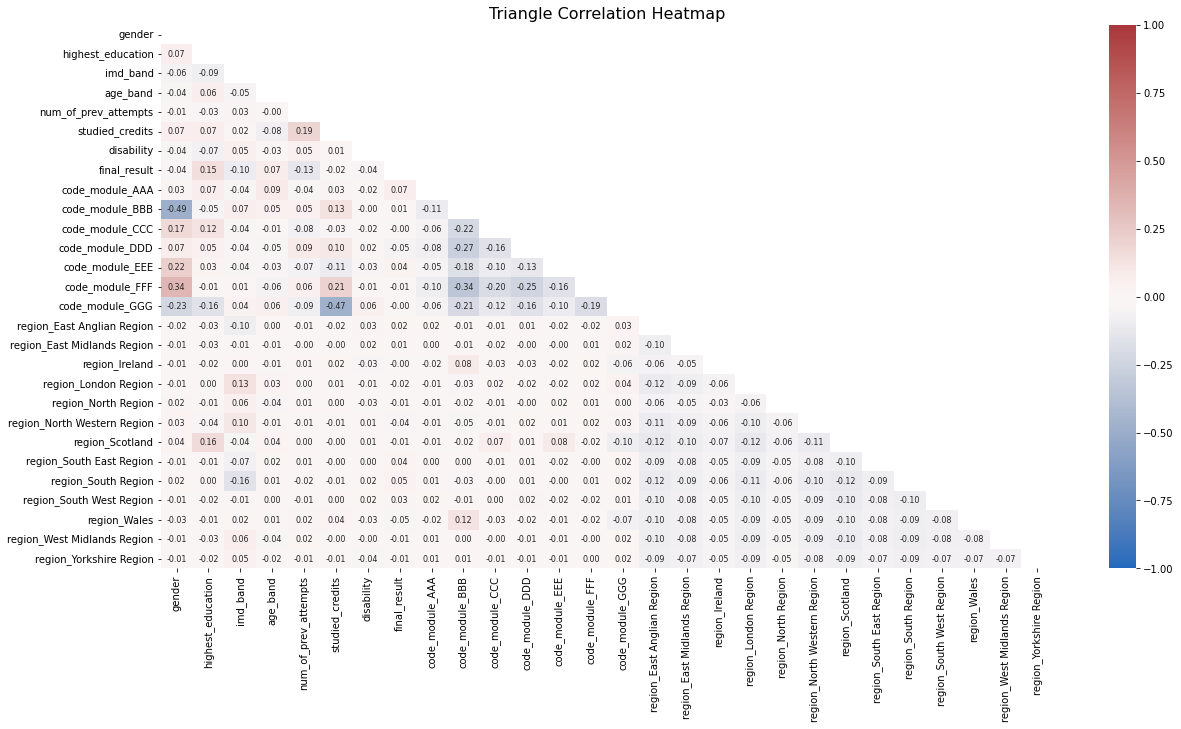

In [9]:
plt.figure(figsize=(20, 10), facecolor="white")

# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_num_scaled_without_codepresentation.corr(method="kendall"), dtype=bool))

heatmap = sns.heatmap(
    data_num_scaled_without_codepresentation.corr(method="kendall"),  
    mask=mask,
    vmin=-1, vmax=1,
    annot=True, 
    annot_kws={"fontsize":8},
    fmt=".2f",
    cmap="vlag"
    )

heatmap.set_title('Triangle Correlation Heatmap', fontsize=16)

### region

In [10]:
col = list()
for column in data_num_scaled_without_codepresentation.columns:
    if "region" in column:
        col.append(column)

data_num_scaled_without_codepresentation_region = data_num_scaled_without_codepresentation.drop(columns=col)

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

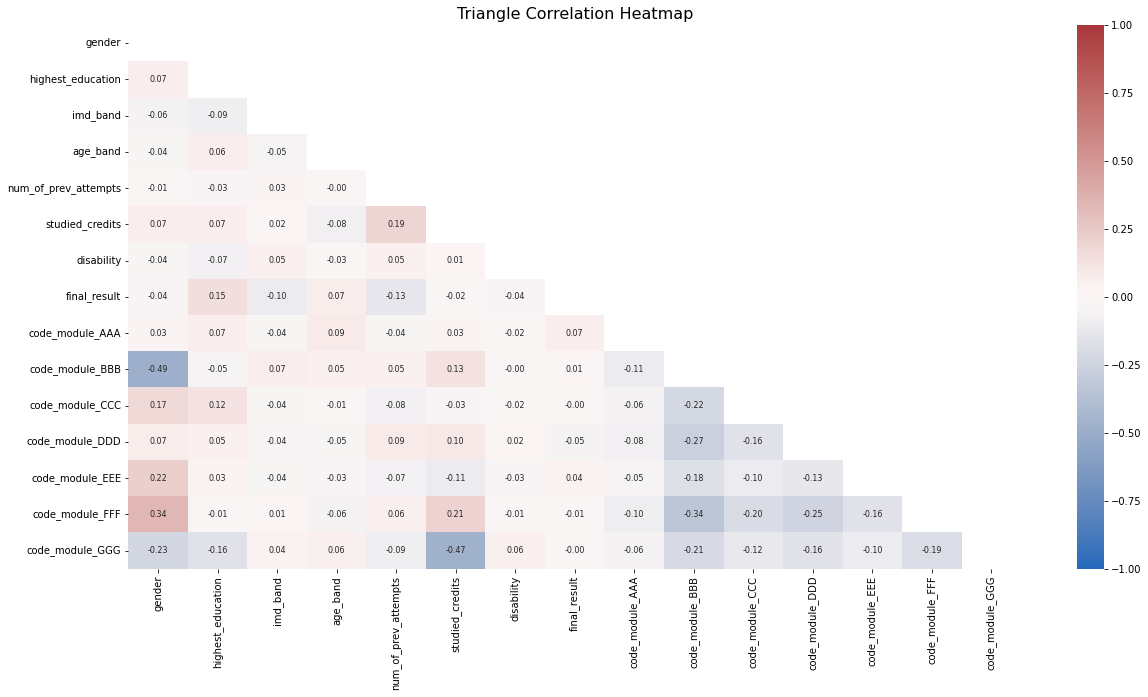

In [11]:
plt.figure(figsize=(20, 10), facecolor="white")

# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_num_scaled_without_codepresentation_region.corr(method="kendall"), dtype=bool))

heatmap = sns.heatmap(
    data_num_scaled_without_codepresentation_region.corr(method="kendall"),  
    mask=mask,
    vmin=-1, vmax=1,
    annot=True, 
    annot_kws={"fontsize":8},
    fmt=".2f",
    cmap="vlag"
    )

heatmap.set_title('Triangle Correlation Heatmap', fontsize=16)

## (Optional) Pairwise relationships and other correlation plots

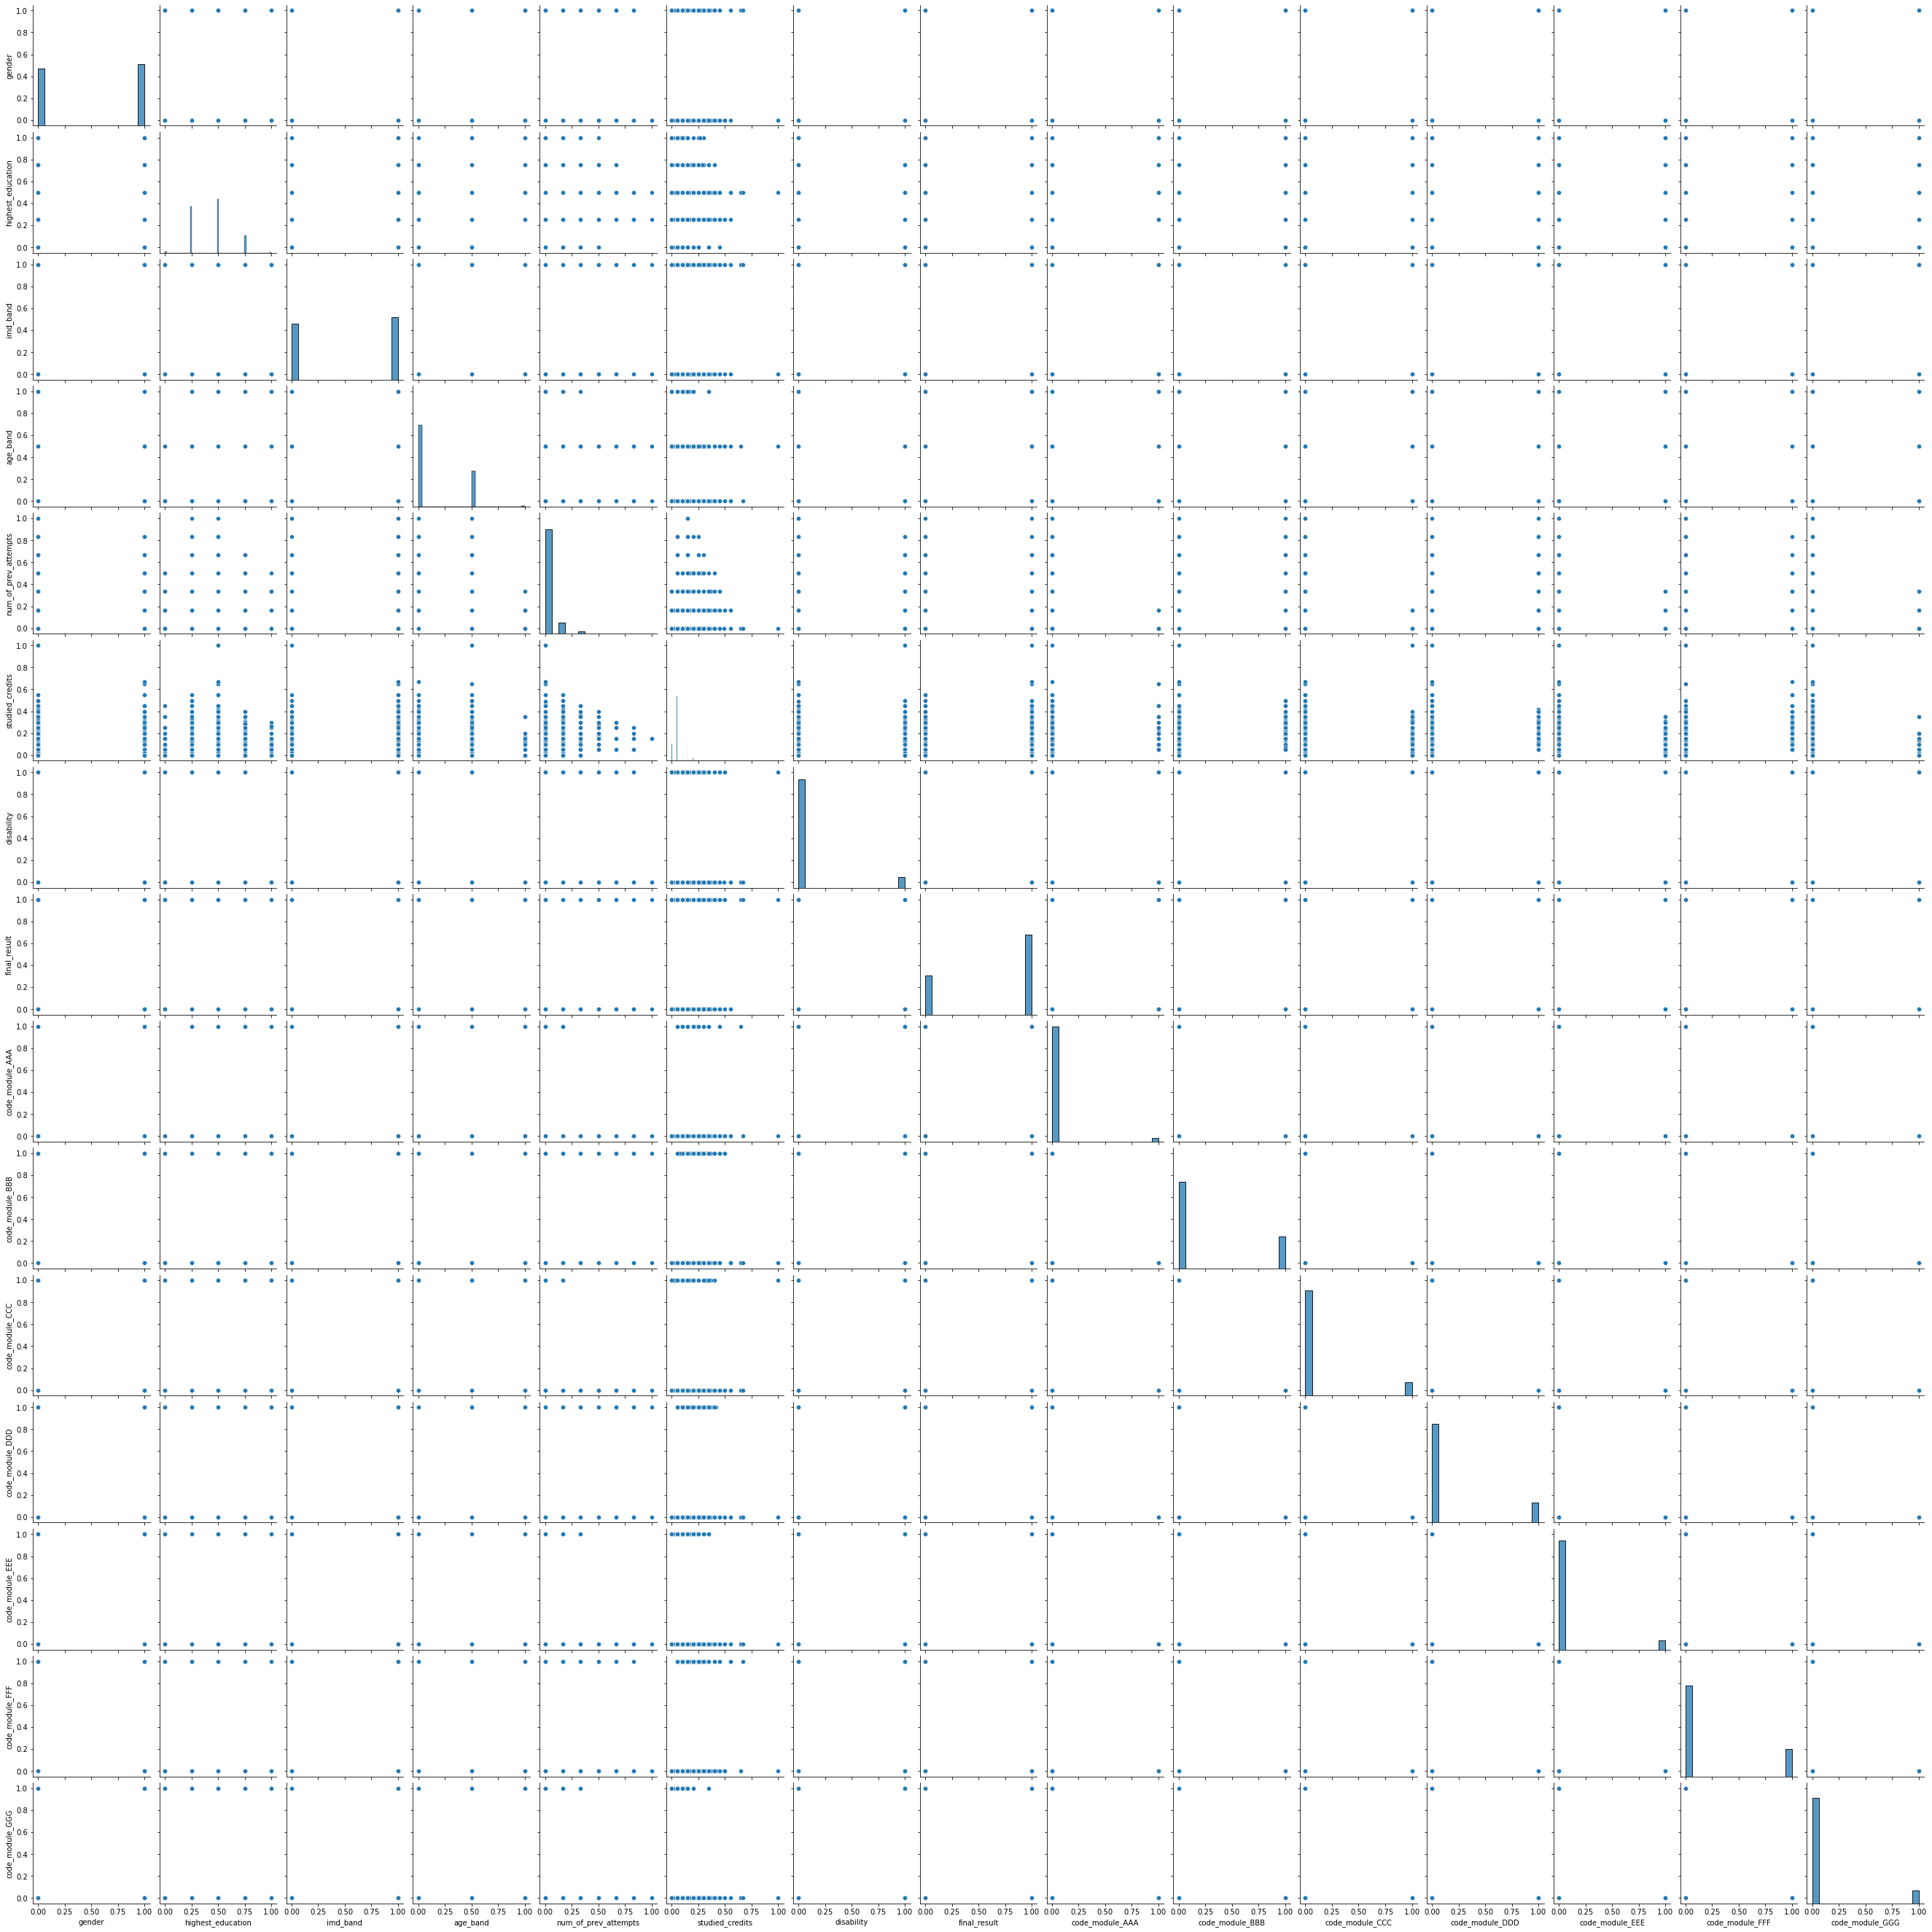

In [12]:
sns.pairplot(data_num_scaled_without_codepresentation_region)

<Figure size 360x360 with 0 Axes>

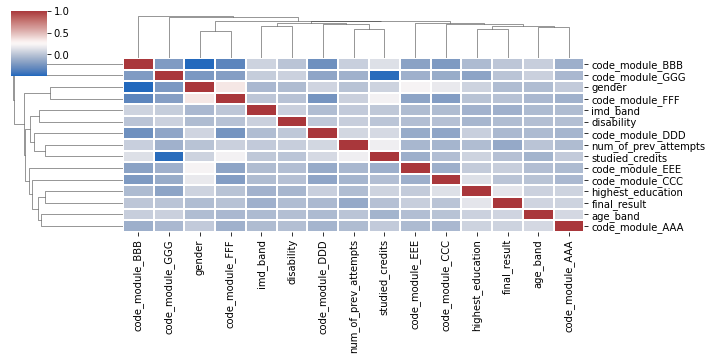

In [13]:
plt.figure(figsize=(5,5))
sns.clustermap(data_num_scaled_without_codepresentation_region.corr(method="kendall"), 
           cmap="vlag",
           linewidths=0.1,
           figsize=(10,5))

<AxesSubplot:>

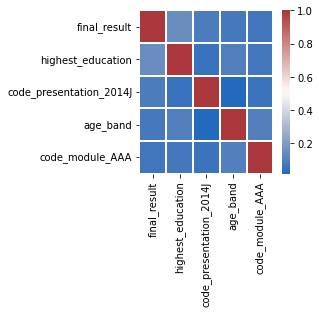

In [14]:
k = 5 #number of variables for heatmap
corrmat = data_num_scaled.corr(method="kendall")
cols = corrmat.nlargest(k, 'final_result')['final_result'].index
cm = np.corrcoef(data_num_scaled[cols].values.T)
f, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(cm, ax=ax, cmap="vlag", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)

## Mutual information

In [15]:
def make_mi_scores(X, y, label):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI scores " + label, index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# MI by final_result
X_mi_finalresult = data_num_scaled_without_codepresentation_region.drop(columns=["final_result"])
y_mi_finalresult = data_num_scaled_without_codepresentation_region["final_result"].astype(int)
mi_scores_finalresult = make_mi_scores(X_mi_finalresult, y_mi_finalresult, "final_result")

# MI by gender
X_mi_gender = data_num_scaled_without_codepresentation_region.drop(columns=["final_result", "gender"])
y_mi_gender = data_num_scaled_without_codepresentation_region["gender"].astype(int)
mi_scores_gender = make_mi_scores(X_mi_gender, y_mi_gender, "gender")

# MI by imd_band
X_mi_imdband = data_num_scaled_without_codepresentation_region.drop(columns=["final_result", "imd_band"])
y_mi_imdband = data_num_scaled_without_codepresentation_region["imd_band"].astype(int)
mi_scores_imdband = make_mi_scores(X_mi_imdband, y_mi_imdband, "imd_band")

<AxesSubplot:>

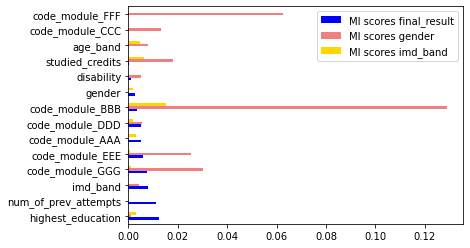

In [16]:
pd.DataFrame([mi_scores_finalresult, mi_scores_gender, mi_scores_imdband]).T.plot.barh(color={"MI scores final_result": "blue", 
                                                                                              "MI scores gender": "lightcoral",
                                                                                              "MI scores imd_band": "gold"})

<AxesSubplot:>

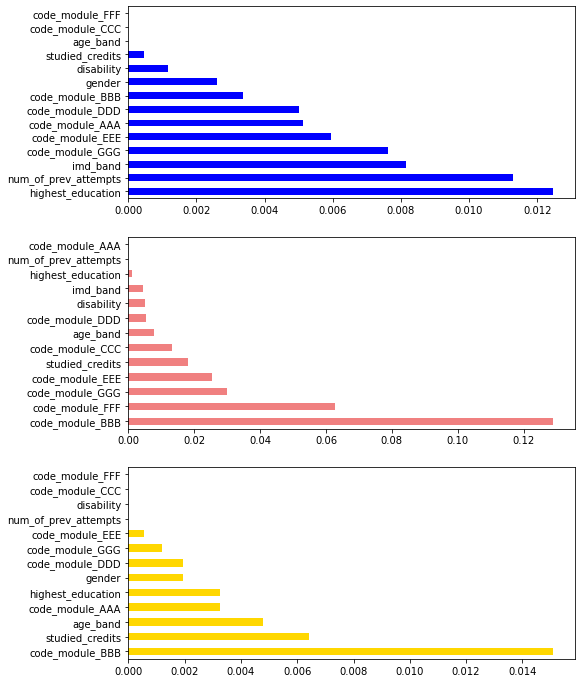

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
mi_scores_finalresult.plot(ax=axes[0], kind="barh", color="blue")
mi_scores_gender.plot(ax=axes[1], kind="barh", color="lightcoral")
mi_scores_imdband.plot(ax=axes[2], kind="barh", color="gold")